In [152]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
import numpy as np

In [3]:
df = geopandas.read_file('../datasets/Neighborhood Tabulation Areas.geojson')
df = df.drop(columns=['county_fips', 'shape_leng', 'shape_area'])

In [4]:
df.boro_code = df.boro_code.astype('int')
df = df[(df.boro_code==1)| (df.boro_code==3)]
df.head()

,ntacode,ntaname,boro_name,boro_code,geometry
0,BK88,Borough Park,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...
4,MN06,Manhattanville,Manhattan,1,(POLYGON ((-73.94607828674226 40.8212632160619...
7,BK25,Homecrest,Brooklyn,3,(POLYGON ((-73.95859278495766 40.6104030309350...
10,MN19,Turtle Bay-East Midtown,Manhattan,1,(POLYGON ((-73.96124698011518 40.7404235971153...
14,BK44,Madison,Brooklyn,3,(POLYGON ((-73.93753749374089 40.6085573897549...


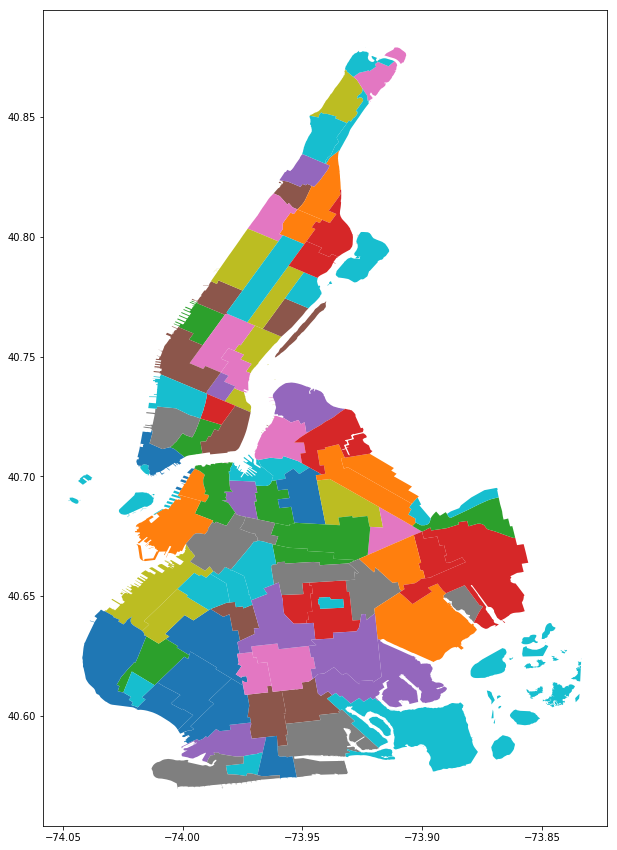

In [6]:
df.plot(figsize=(25,15),column='ntaname');

In [7]:
df.ntacode.unique()

array(['BK88', 'MN06', 'BK25', 'MN19', 'BK44', 'BK41', 'BK95', 'BK69',
       'BK17', 'BK43', 'BK26', 'BK29', 'BK72', 'BK75', 'BK35', 'BK79',
       'BK61', 'BK63', 'BK96', 'BK93', 'BK91', 'BK78', 'BK77', 'BK46',
       'BK68', 'MN31', 'BK30', 'BK23', 'BK09', 'MN15', 'BK85', 'BK27',
       'BK28', 'BK76', 'BK73', 'BK81', 'MN27', 'MN35', 'MN25', 'MN14',
       'MN17', 'MN40', 'BK34', 'BK60', 'MN11', 'BK19', 'BK21', 'MN50',
       'BK38', 'BK40', 'BK64', 'BK45', 'BK50', 'BK42', 'BK58', 'BK32',
       'BK33', 'BK37', 'BK90', 'MN20', 'MN09', 'MN03', 'BK82', 'BK83',
       'MN32', 'MN04', 'MN36', 'BK31', 'MN28', 'MN21', 'MN01', 'MN22',
       'MN24', 'MN13', 'MN23', 'MN12', 'MN99', 'MN33', 'MN34', 'BK99'],
      dtype=object)

In [8]:
df.head()

,ntacode,ntaname,boro_name,boro_code,geometry
0,BK88,Borough Park,Brooklyn,3,(POLYGON ((-73.97604935657381 40.6312759056467...
4,MN06,Manhattanville,Manhattan,1,(POLYGON ((-73.94607828674226 40.8212632160619...
7,BK25,Homecrest,Brooklyn,3,(POLYGON ((-73.95859278495766 40.6104030309350...
10,MN19,Turtle Bay-East Midtown,Manhattan,1,(POLYGON ((-73.96124698011518 40.7404235971153...
14,BK44,Madison,Brooklyn,3,(POLYGON ((-73.93753749374089 40.6085573897549...


In [9]:
from shapely.geometry import Point

In [10]:
point = Point(-74.004256,40.600003)
point2 = geopandas.GeoSeries(point)

In [11]:
df[df.contains(point)]

,ntacode,ntaname,boro_name,boro_code,geometry
77,BK27,Bath Beach,Brooklyn,3,(POLYGON ((-74.00200394677509 40.5941323717782...


# read apt dataframe and convert to geodf

In [12]:
#read df and convert to geodf
merged_df = pd.read_csv('merged_df.csv',index_col=0)

geometry = [Point(xy) for xy in zip(merged_df.lng, merged_df.lat)]
df2 = merged_df.drop(['lng','lat'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = geopandas.GeoDataFrame(df2, crs=crs, geometry=geometry)

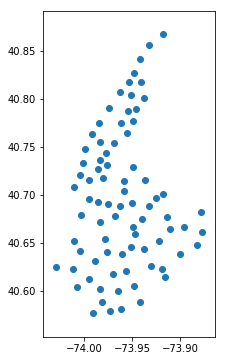

In [13]:
df.centroid.plot(figsize=(10,6));

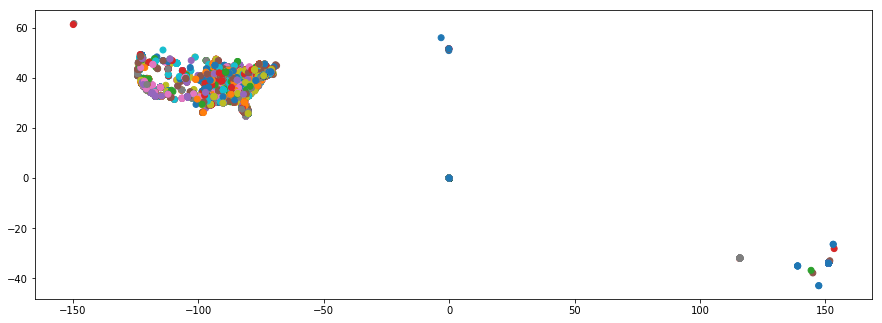

In [14]:
gdf.plot(column=gdf.address,figsize=(15,10));

In [15]:
test = df.geometry[0].centroid

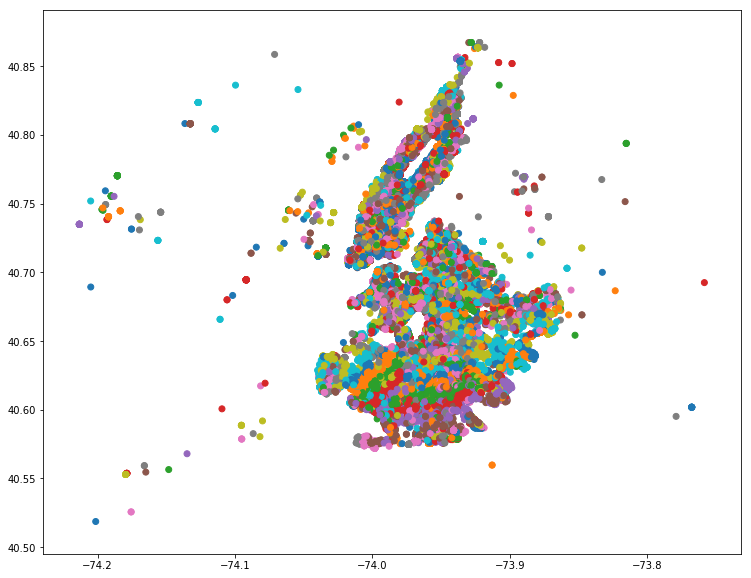

In [18]:
gdf[gdf.distance(test)<.25].plot(column=gdf[gdf.distance(test)<.25].address,figsize=(15,10));

### Load subway/citibike data

In [201]:
subway_df = pd.read_csv('subway_data.csv',index_col=0)
citi_13 = pd.read_csv('citi_13_data.csv',index_col=0)
citi_18 =pd.read_csv('citi_18_data.csv',index_col=0)

In [204]:
geometry = [Point(xy) for xy in zip(subway_df.long, subway_df.lat)]
crs = {'init': 'epsg:4326'}
subway_gdf = geopandas.GeoDataFrame(subway_df, crs=crs,geometry=geometry)
subway_gdf = subway_gdf.drop(columns=['the_geom','URL','NOTES','OBJECTID'])

In [205]:
subway_gdf = subway_gdf[subway_gdf.lat>1]
subway_gdf.reindex()

,NAME,LINE,lat,long,geometry
0,Astor Pl,4-6-6 Express,40.730054,-73.991070,POINT (-73.9910699 40.730054)
1,Canal St,4-6-6 Express,40.718803,-74.000193,POINT (-74.0001929 40.718803)
2,50th St,1-2,40.761728,-73.983849,POINT (-73.98384890000001 40.7617279)
3,Bergen St,2-3-4,40.680862,-73.974999,POINT (-73.97499909999999 40.68086210000001)
4,Pennsylvania Ave,3-4,40.664714,-73.894886,POINT (-73.89488590000001 40.66471439999999)
5,238th St,1,40.884667,-73.900870,POINT (-73.90087 40.884667)
6,Cathedral Pkwy (110th St),A-B-C,40.800582,-73.958067,POINT (-73.9580667 40.80058155)
7,Kingston - Throop Aves,A-C,40.679919,-73.940859,POINT (-73.94085890000001 40.6799189)
8,65th St,E-M-R,40.749719,-73.898788,POINT (-73.89878829999999 40.7497195)
9,36th St,E-M-R,40.751960,-73.929018,POINT (-73.92901809999999 40.75196)


# FIND CLOSEST SUBWAYS FOR ONE APT

In [206]:
### ADDRESS: 90 LEXINGTON AVENUE, 10016
### NEIGHBORHOOD: GRAMERCY
### POINT = (-73.95371589999998 40.782063)

x = gdf.geometry[846]

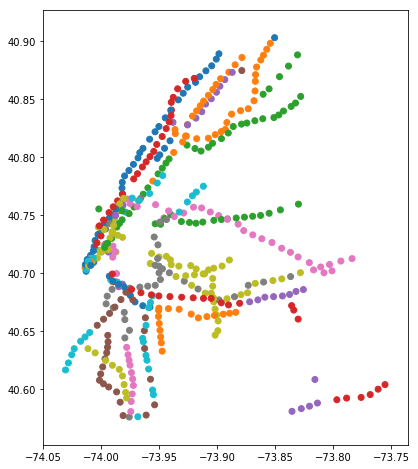

In [207]:
subway_gdf.plot(column=subway_gdf.LINE,figsize=(10,8));

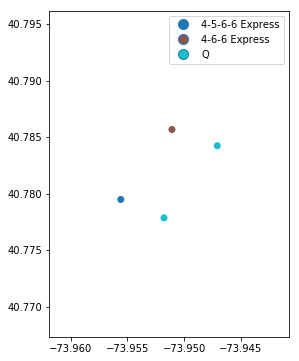

In [26]:
subway_gdf[subway_gdf.geometry.distance(x)<.008].plot(column=subway_gdf[subway_gdf.geometry.distance(x)<.008].LINE,figsize=(10,6),legend=True);

In [208]:
subway_gdf[subway_gdf.geometry.distance(x)<.008]

,NAME,LINE,lat,long,geometry
32,96th St,4-6-6 Express,40.785672,-73.951070,POINT (-73.95107 40.7856719)
450,86th St,4-5-6-6 Express,40.779492,-73.955589,POINT (-73.95558890000001 40.7794919)
471,86th St,Q,40.777861,-73.951771,POINT (-73.9517709 40.777861)
472,96th St,Q,40.784237,-73.947066,POINT (-73.94706600000001 40.78423665)


In [251]:
import time

def get_nearest_subways(distance):
    start = time.time()
    nearest_subways_dict = {}
    for c, apt in enumerate(gdf.address):
        if apt not in nearest_subways_dict.keys():
            nearest_subways = subway_gdf[subway_gdf.geometry.distance(gdf.geometry[c])<=distance]
            num_subways = len(nearest_subways)
            nearest_subways_dict[apt] = {'stations':list(nearest_subways.NAME),'lines':list(nearest_subways.LINE),
                                         'num_within_distance':num_subways,'geometry':list(nearest_subways.geometry)}
        #print(c,apt,nearest_subways)
        if c%5000 == 0:
            curr_time = time.time()
            if c != 0:
                print('Running time: {} seconds, {} entries remaining'.format(np.round((curr_time-start),2),len(gdf)-c))
    print ('Total Seconds to Complete: ',np.round(time.time()-start),2)
    return nearest_subways_dict
    

In [252]:
t = get_nearest_subways(.008)

Running time: 6.23 seconds, 68157 entries remaining
Running time: 14.97 seconds, 63157 entries remaining
Running time: 19.29 seconds, 58157 entries remaining
Running time: 20.77 seconds, 53157 entries remaining
Running time: 23.51 seconds, 48157 entries remaining
Running time: 24.65 seconds, 43157 entries remaining
Running time: 26.71 seconds, 38157 entries remaining
Running time: 28.25 seconds, 33157 entries remaining
Running time: 34.5 seconds, 28157 entries remaining
Running time: 47.11 seconds, 23157 entries remaining
Running time: 57.55 seconds, 18157 entries remaining
Running time: 71.77 seconds, 13157 entries remaining
Running time: 84.25 seconds, 8157 entries remaining
Running time: 101.88 seconds, 3157 entries remaining
Total Seconds to Complete:  112.0 2


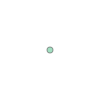

In [254]:
t['150 WEST 66 STREET']['geometry'][0]

In [255]:
nearest_subways_df = geopandas.GeoDataFrame.from_dict(t,orient='index')

In [256]:
nearest_subways_df[nearest_subways_df.num_within_distance >0]

,stations,lines,num_within_distance,geometry
0 ALLEN STREET,"[Delancey St - Essex St, East Broadway, Delanc...","[J-M-Z, F, F, F, B-D, J-Z, 4-6-6 Express]",7,"[POINT (-73.9874094 40.718306), POINT (-73.990..."
0 BANNER 3 TERRACE,"[Ocean Pkwy, Brighton Beach]","[Q, B-Q]",2,"[POINT (-73.96850090000001 40.5763116), POINT ..."
0 BAYARD STREET,"[Lorimer St, Nassau Ave, Metropolitan Ave, Bed...","[L, G, G, L]",4,"[POINT (-73.95024790000001 40.71407199999999),..."
0 BEACON COURT,"[Lexington Ave - 59th St, 51st St, 68th St - H...","[4-5-6-6 Express, 4-6-6 Express, 4-6-6 Express...",8,"[POINT (-73.967967 40.762526), POINT (-73.9719..."
0 BEEKMAN STREET,"[Brooklyn Bridge - City Hall, Fulton St, Chamb...","[4-5-6-6 Express, A-C, A-C, 2-3, 2-3, 1-2-3, E...",18,"[POINT (-74.004131 40.71306499), POINT (-74.00..."
0 BLEECKER STREET,"[Astor Pl, Lower East Side - 2nd Ave, Prince S...","[4-6-6 Express, F, N-Q-R-W, N-Q-R-W, B-D, B-D-...",9,"[POINT (-73.9910699 40.730054), POINT (-73.989..."
0 BOERUM PLACE,"[Borough Hall, Hoyt - Schermerhorn Sts, Jay St...","[4-5, A-C-G, A-C-F, F-G, N-R, N-R, 2-3, 2-3]",8,"[POINT (-73.990151 40.69240399), POINT (-73.98..."
0 BOND STREET,"[Astor Pl, Lower East Side - 2nd Ave, Prince S...","[4-6-6 Express, F, N-Q-R-W, N-Q-R-W, B-D-F-M, ...",8,"[POINT (-73.9910699 40.730054), POINT (-73.989..."
0 BRIGHTON 10 COURT,"[Brighton Beach, Sheepshead Bay]","[B-Q, B-Q]",2,"[POINT (-73.9613537 40.57771019), POINT (-73.9..."
0 BUSHWICK AVENUE,"[Kosciuszko St, Gates Ave, Central Ave, Knicke...","[J, J-Z, M, M]",4,"[POINT (-73.9285089 40.693172), POINT (-73.922..."
